In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import pymc3 as pm

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
np.random.seed(123)
n_experiments = 4
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=n_experiments)
data

array([1, 0, 0, 0])

In [18]:
with pm.Model() as first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(1000, step=step, start=start)

/Users/andrewenfield/miniconda3/envs/anaconda/lib/python3.6/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


Optimization terminated successfully.
         Current function value: 3.819085


100%|██████████| 1000/1000 [00:00<00:00, 7102.87it/s]

         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114d07630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114d54fd0>]], dtype=object)

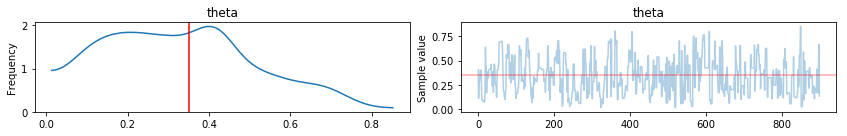

In [17]:
burnin = 100
chain = trace[burnin:]
pm.traceplot(chain, lines={'theta':theta_real})

100%|██████████| 1000/1000 [00:00<00:00, 3066.39it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1156b54a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114c71d68>]], dtype=object)

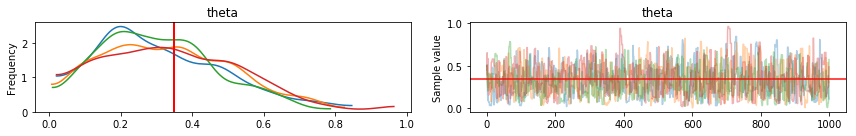

In [19]:
with first_model:
    step = pm.Metropolis()
    multi_trace = pm.sample(1000, step=step, njobs=4)
    
burnin = 0
multi_chain = multi_trace[burnin:]
pm.traceplot(multi_chain, lines={'theta':theta_real})

In [20]:
pm.gelman_rubin(multi_chain)

{'theta': 1.0050032938001174, 'theta_logodds_': 1.0035967734064435}

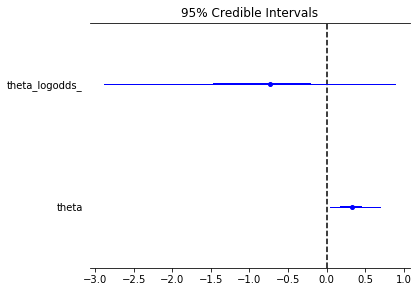

In [22]:
pm.forestplot(chain)

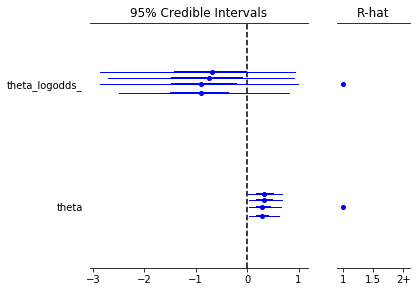

In [23]:
pm.forestplot(multi_chain)

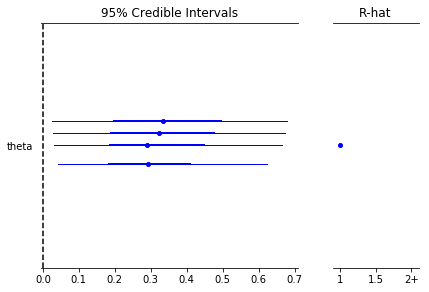

In [24]:
pm.forestplot(multi_chain, varnames=['theta'])

In [25]:
pm.summary(multi_chain)


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.328            0.178            0.006            [0.031, 0.658]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.055          0.189          0.308          0.450          0.714



In [26]:
pm.df_summary(multi_chain)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
theta,0.327991,0.17819,0.006416,0.031337,0.657878


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115d5ff28>]], dtype=object)

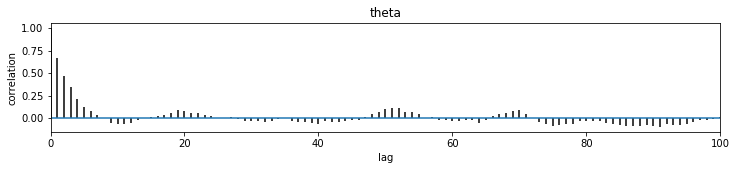

In [27]:
pm.autocorrplot(chain)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115df7320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1161506d8>]], dtype=object)

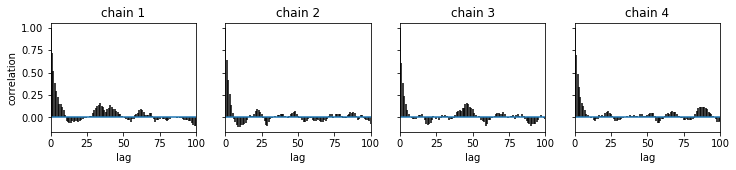

In [28]:
pm.autocorrplot(multi_chain)

In [31]:
pm.effective_n(multi_chain)['theta']

802.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x116336a58>], dtype=object)

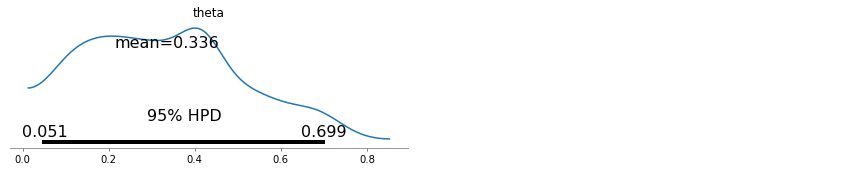

In [32]:
pm.plot_posterior(chain, kde_plot=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x116457550>], dtype=object)

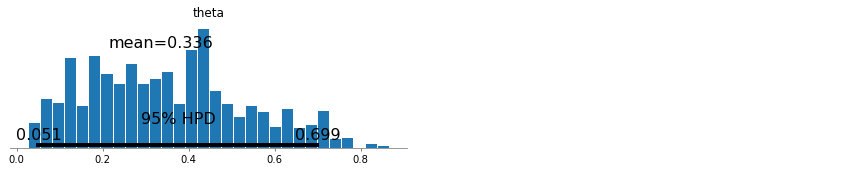

In [33]:
pm.plot_posterior(chain)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115dbf8d0>], dtype=object)

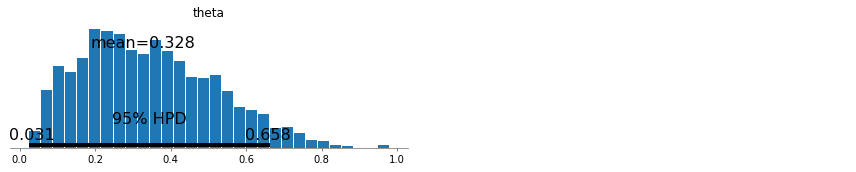

In [34]:
pm.plot_posterior(multi_chain)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x110215198>], dtype=object)

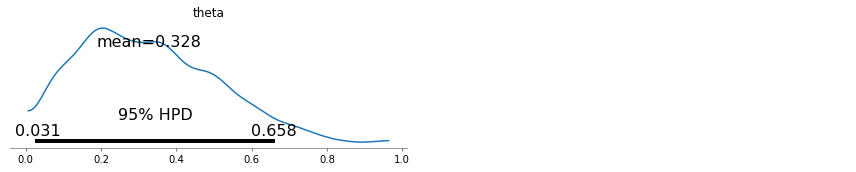

In [35]:
pm.plot_posterior(multi_chain, kde_plot=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115672d30>], dtype=object)

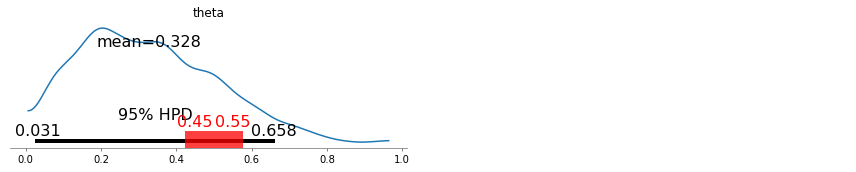

In [36]:
pm.plot_posterior(multi_chain, kde_plot=True, rope=[.45,.55])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115cddcf8>], dtype=object)

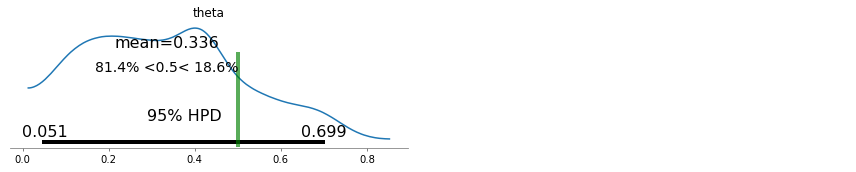

In [37]:
pm.plot_posterior(chain, kde_plot=True, ref_val=0.5)